In [1]:
import pandas as pd
import nose.tools
import numpy as np
import matplotlib.pyplot as plt

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

### Problem 1. Read the dataset (2 points)
The dataset [here](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) contains information about fuel consumption in different cars.

Click the "Data Folder" link and read `auto_mpg.data` into Python. You can download it, if you wish, or you can read it directly from the link.

Give meaningful (and "Pythonic") column names, as per the `auto_mpg.names` file:
1. mpg
2. cylinders
3. displacement
4. horsepower
5. weight
6. acceleration
7. model_year
8. origin
9. car_name

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
mpg_data = pd.read_fwf(url, header=None)

In [3]:
mpg_data.columns = [
    "mpg", 
    "cylinders", 
    "displacement", 
    "horsepower", 
    "weight", 
    "acceleration", 
    "model_year", 
    "origin", 
    "car_name",
]

In [4]:
nose.tools.assert_is_not_none(mpg_data)

Print the first 4 rows in the dataset to get a feel of what it looks like:

In [5]:
mpg_data.head(4)

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   

   origin                     car_name  
0       1  "chevrolet chevelle malibu"  
1       1          "buick skylark 320"  
2       1         "plymouth satellite"  
3       1              "amc rebel sst"

### Problem 2. Inspect the dataset (1 point)
Write a function which accepts a dataset and returns the number of observations and features in it, like so: 

``` 10 observations on 15 features```

Where 10 and 15 should be replaced with the real numbers. Test your function with the `auto_mpg` dataset.

Make sure the function works with other datasets (don't worry about "1 features" or "1 observations", just leave it as it is).

In [6]:
def observations_and_features(dataset):
    """
    Returns the number of observations and features in the provided dataset
    """
    observations = dataset.shape[0]
    features = dataset.shape[1]
    return f"{observations} observations on {features} features"

In [7]:
print(observations_and_features(mpg_data))

398 observations on 9 features


Inspect the data types for each column.

In [8]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

### Problem 3. Correct errors (1 point)
The `horsepower` column looks strange. It's a string but it must be a floating-point number. Find out why this is so and convert it to floating-point number.

In [9]:
mpg_data.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [10]:
mpg_data.horsepower = mpg_data.horsepower.replace('?', np.nan).astype(float)

In [11]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [12]:
nose.tools.assert_equal(mpg_data.horsepower.dtype, "float64")

### Problem 4. Missing values: inspection (1 point)
We saw that the `horsepower` column contained null values. Display the rows which contain those values. Assign the resulting dataframe to the `unknown_hp` variable.

In [13]:
def get_unknown_hp(dataframe):
    """
    Returns the rows in the provided dataframe where the "horsepower" column is NaN
    """
    unknown_hp = dataframe[dataframe.horsepower.isna()]
    return unknown_hp

In [14]:
cars_with_unknown_hp = get_unknown_hp(mpg_data)
print(cars_with_unknown_hp)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN  2046.0          19.0   
126  21.0          6         200.0         NaN  2875.0          17.0   
330  40.9          4          85.0         NaN  1835.0          17.3   
336  23.6          4         140.0         NaN  2905.0          14.3   
354  34.5          4         100.0         NaN  2320.0          15.8   
374  23.0          4         151.0         NaN  3035.0          20.5   

     model_year  origin                car_name  
32           71       1            "ford pinto"  
126          74       1         "ford maverick"  
330          80       2  "renault lecar deluxe"  
336          80       1    "ford mustang cobra"  
354          81       2           "renault 18i"  
374          82       1        "amc concord dl"  


### Problem 5. Missing data: correction (1 point)
It seems like the `NaN` values are a small fraction of all values. We can try one of several things:
* Remove them
* Replace them (e.g. with the mean power of all cars)
* Look up the models on the internet and try our best guess on the power

The third one is probably the best but the first one will suffice since these records are too few. Remove those values. Save the dataset in the same `mpg_data` variable. Ensure there are no more `NaN`s.

In [15]:
mpg_data = mpg_data.dropna()

In [16]:
nose.tools.assert_equal(len(get_unknown_hp(mpg_data)), 0)

### Problem 6. Years of production (1 + 1 points)
Display all unique model years. Assign them to the variable `model_years`.

In [17]:
def get_unique_model_years(dataframe):
    """
    Returns the unique values of the "model_year" column
    of the dataframe
    """
    model_years = mpg_data.model_year.unique()
    return model_years

In [18]:
model_years = get_unique_model_years(mpg_data)
print(model_years)

[70 71 72 73 74 75 76 77 78 79 80 81 82]


These don't look so good. Convert them to real years, like `70 -> 1970, 71 -> 1971`. Replace the column values in the dataframe.

In [19]:
long_model_years = ('19' + mpg_data.model_year.astype(str)).astype(int)
mpg_data.model_year = long_model_years

In [20]:
model_years = get_unique_model_years(mpg_data)
print(model_years)

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982]


### Problem 7. Exploration: low-power cars (1 point)
The data looks quite good now. Let's try some exploration.

Write a function to find the cars which have the smallest number of cylinders and print their model names. Return a list of car names.

In [21]:
def get_model_names_smallest_cylinders(dataframe):
    """
    Returns the names of the cars with the smallest number of cylinders
    """
    car_names = mpg_data.nsmallest(1, 'cylinders', keep='all').car_name
    return car_names

In [22]:
car_names = get_model_names_smallest_cylinders(mpg_data)
print(car_names)
nose.tools.assert_true(car_names.shape == (4,) or car_names.shape == (4, 1))

71     "mazda rx2 coupe"
111          "maxda rx3"
243         "mazda rx-4"
334      "mazda rx-7 gs"
Name: car_name, dtype: object


### Problem 8. Exploration: correlations (1 point)
Finally, let's see some connections between variables. These are also called **correlations**.

Find how to calculate correlations between different columns using `pandas`.

**Hint:** The correlation function in `pandas` returns a `DataFrame` by default. You need only one value from it.

Create a function which accepts a dataframe and two columns and prints the correlation coefficient between those two columns.

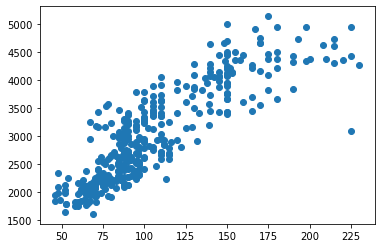

In [33]:
plt.scatter(mpg_data.horsepower, mpg_data.weight)

In [29]:
def calculate_correlation(dataframe, first_column, second_column):
    """
    Calculates and returns the correlation coefficient between the two columns in the dataframe.
    """
    correlation = dataframe[[first_column, second_column]].corr().iloc[0,1]
    return correlation

In [30]:
hp_weight = calculate_correlation(mpg_data, "horsepower", "weight")
print("Horsepower:Weight correlation coefficient:", hp_weight)
nose.tools.assert_almost_equal(hp_weight, 0.864537737574, delta = 0.01)


Horsepower:Weight correlation coefficient: 0.8645377375741455
